In [50]:
URL_FILE_1 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/dataset_parser.py"
URL_FILE_2 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/wiki_extractor.py"
URL_FILE_3 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/custom_dataset.py"
URL_FILE_4 = "https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/enwiki_features.py"

print("Downloading file 1...")
!wget {URL_FILE_1}

print("\nDownloading file 2...")
!wget {URL_FILE_2}

print("\nDownloading file 3...")
!wget {URL_FILE_3}

print("\nDownloading file 4...")
!wget {URL_FILE_4}

print("\nDownload completati. Contenuto della directory corrente:")

--2025-05-03 22:26:31--  https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/dataset_parser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9788 (9.6K) [text/plain]
Saving to: ‘dataset_parser.py.2’

dataset_parser.py.2 100%[===================>]   9.56K  --.-KB/s    in 0.001s  

2025-05-03 22:26:31 (7.48 MB/s) - ‘dataset_parser.py.2’ saved [9788/9788]


--2025-05-03 22:26:32--  https://raw.githubusercontent.com/giankev/wikidata_cultural_classifier/refs/heads/main/wiki_extractor.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, 

In [51]:
!pip install xgboost pandas scikit-learn wikidata


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [52]:
# Imports
import os
import xgboost as xgb
import pandas as pd
import numpy as np

from custom_dataset import CustomData
from enwiki_features import preprocess

In [53]:
# Is the input file a validation set with a label column, used to check if the model is loading and working as intended?
# Good for testing and final checks
TEST_ON_VALID_SET = False

In [54]:
# Percorsi file
RAW_TEST_CSV        = '~/content/test_unlabeled.csv'
PROCESSED_TEST_CSV  = '~/content/test_unlabeled_processed.csv'

# Flag per forzare il ricalcolo
FORCE_REPROCESS = False

df_processed = None

# --- Try to load the already processed file, if it exists ---
if not FORCE_REPROCESS and os.path.exists(PROCESSED_TEST_CSV):
    print(f"Loading preprocessed data: {PROCESSED_TEST_CSV}...")
    try:
        df_processed = pd.read_csv(PROCESSED_TEST_CSV)
        print("Loading data done.")
    except Exception as e:
        print(f"Loading error {PROCESSED_TEST_CSV}, starting recomputing: {e}")
        df_processed = None  # Force recomputing

# --- If not existing or forced to, recompute the features ---
if df_processed is None:
    print("Processing test data non labeled...")
    try:
        # 1. Load the initial CSV file
        df_test_raw = pd.read_csv(RAW_TEST_CSV)
        
        # 2. Instantiate preprocessor and add features
        processor_test = CustomData(df_test_raw)
        df_test_featured = processor_test.add_feature()
        
        if df_test_featured is not None:
            # 3. Apply preprocess (encoding, scaling, ecc.)
            df_processed = processor_test.preprocess_data(df_test_featured)
            
            if df_processed is not None:
                # 4. Save result on an output CSV
                df_processed.to_csv(PROCESSED_TEST_CSV, index=False)
                print(f"Test data processed and saved in {PROCESSED_TEST_CSV}.")
            else:
                print("WARNING: Test data is None or empty, saving failed.")
        else:
            print("ERROR: Failed to add preprocessed features.")
        
    except Exception as e:
        print(f"ERROR during data preprocessing: {e}")
        df_processed = None

# --- final check ---
if df_processed is not None:
    print("\n--- Test processed ---")
    print(f"Shape of preprocessed data: {df_processed.shape}")
else:
    print("\nERROR: could not load preprocessed data.")

Processing test data non labeled...
Adding feature...

Fetch Summary:
  Attempted: 300
  Successful Fetches (Extractor created): 300
  Failed Fetches (Extractor is None): 0
Feature added...

--- Preprocessing DataFrame (Initial rows: 300) ---
Handling Missing Values: Nessuna riga con NaN trovata.
--- Preprocessing Completo (Final rows: 300, Final columns: 32) ---
Test data processed and saved in ~/content/test_unlabeled_processed.csv.

--- Test processed ---
Shape of preprocessed data: (300, 32)


In [ ]:

# Percorsi file
RAW_TEST_CSV        = '~/content/test_unlabeled.csv'
PROCESSED_TEST_CSV  = '~/content/test_unlabeled_augmented.csv'

# Flag to force data augmentation recomputing
FORCE_REPROCESS = False

df_aug = None

# Load the augmented data if present
if not FORCE_REPROCESS:
    try:
        df_aug = pd.read_csv(PROCESSED_TEST_CSV)
        print(f"Augmented data shape: {df_aug.shape}")
    except Exception as e:
        print(f"ERROR - could not load augmented data, trying to preprocess it: {e}")

# data augmentation from wikipedia scraping 
if FORCE_REPROCESS or df_aug == None:
    preprocess(RAW_TEST_CSV, PROCESSED_TEST_CSV, 10)
    try:
        df_aug = pd.read_csv(PROCESSED_TEST_CSV)
        print(f"Augmented data shape: {df_aug.shape}")
    except Exception as e:
        print(f"ERROR - could not load augmented data: {e}")

# Display the first few rows
df_aug.head()

Processed 6/300

In [6]:
# augmented data with Custom Data
df_processed.columns.tolist()

['type',
 'label',
 'number_sitelinks',
 'sitelinks_translation_entropy',
 'number_claims',
 'po_P495',
 'po_P1343',
 'po_P2596',
 'po_P17',
 'number_of_P31',
 'sum_cultural_claims',
 'po_P172',
 'po_P1268',
 'po_P136',
 'category_architecture',
 'category_biology',
 'category_books',
 'category_comics and anime',
 'category_fashion',
 'category_films',
 'category_food',
 'category_geography',
 'category_gestures and habits',
 'category_history',
 'category_literature',
 'category_media',
 'category_music',
 'category_performing arts',
 'category_philosophy and religion',
 'category_politics',
 'category_sports',
 'category_transportation',
 'category_visual arts']

In [7]:
# loaded augmented data from wikipedia scraping
df_aug.columns.tolist()

['item',
 'name',
 'type',
 'category',
 'subcategory',
 'label',
 'title',
 'page_length',
 'num_links',
 'mean_sitelinks_count',
 'median_sitelinks_count',
 'std_sitelinks_count']

In [ ]:
# reindex the augmented data to match between the two files
data_aug_aligned = df_aug.reindex(df_processed.index)
print(f"\nShape train_aug_aligned dopo reindex: {data_aug_aligned.shape}")

# check if indexes have been matched correctly
if df_processed.index.equals(df_aug.index):
    print("Features merged successfully")
else:
    print("ERROR: could not merge features by index")

# drop useless columns for classification scopes, merge the two sets of augmented data and features
data_aug_aligned = data_aug_aligned.drop(columns=['item', 'name', 'type', 'category', 'subcategory', 'title'])
df_val_aug_concat = pd.concat([df_processed, data_aug_aligned], axis=1)

# optionally, if checking the model, drop the label column and prepare a y_val for evaluation
if TEST_ON_VALID_SET:
    data_aug_aligned = data_aug_aligned.drop(columns=['label'])
    y_val = df_val_aug_concat['label']
    df_val_aug_concat = df_val_aug_concat.drop(columns=['label'])

# ensure that all the columns (the features names) are lower case
df_val_aug_concat.columns = df_val_aug_concat.columns.str.lower()

# display the final list of features 
features = df_val_aug_concat.columns.tolist()
for name in features:
    print(name)


Shape train_aug_aligned dopo reindex: (300, 12)
Features merged successfully
0      cultural representative
1           cultural exclusive
2      cultural representative
3           cultural exclusive
4      cultural representative
                ...           
295          cultural agnostic
296    cultural representative
297         cultural exclusive
298    cultural representative
299         cultural exclusive
Name: label, Length: 300, dtype: object
type
number_sitelinks
sitelinks_translation_entropy
number_claims
po_p495
po_p1343
po_p2596
po_p17
number_of_p31
sum_cultural_claims
po_p172
po_p1268
po_p136
category_architecture
category_biology
category_books
category_comics and anime
category_fashion
category_films
category_food
category_geography
category_gestures and habits
category_history
category_literature
category_media
category_music
category_performing arts
category_philosophy and religion
category_politics
category_sports
category_transportation
category_visual arts
page_

In [ ]:
df = df_val_aug_concat.apply(pd.to_numeric, errors='coerce')

print("Final shape:")
print(f"  Data: {df.shape}")

Shape before scaling:
  Data: (300, 37)


In [ ]:
# Load the XGBoost model
model_path = '~/content/xgb_best_model_77.json'
booster = xgb.Booster()
booster.load_model(model_path)

# Ensure that all the feature names are lower case and match the set columns
booster.feature_names = [f.lower() for f in booster.feature_names]

# XGBoost is sensitive to column order, rearrange their order to be correct
df.columns = booster.feature_names

# Convert test data to DMatrix for inference
dtest = xgb.DMatrix(df)

# Run inference
y_pred_raw = booster.predict(dtest)
y_pred = np.argmax(y_pred_raw, axis=1)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:label: object

In [27]:
# Map numeric predictions to class labels
label_map = {
    0: "cultural representative",
    1: "cultural exclusive",
    2: "cultural agnostic"
}

df['label'] = [label_map[i] for i in y_pred]

In [28]:
# Save to a new CSV
output_path = '~/content/test_out_noLLM.csv'
df.to_csv(output_path, index=False)

print(f"Saved predictions to {output_path}")

Saved predictions to ~/content/test_out_noLLM.csv



Ultra Stacking Mode Completed!
Final evaluation metrics: {'accuracy': 0.77, 'precision': 0.7663640707118967, 'recall': 0.7632997843278218, 'f1': 0.7594726800763142}


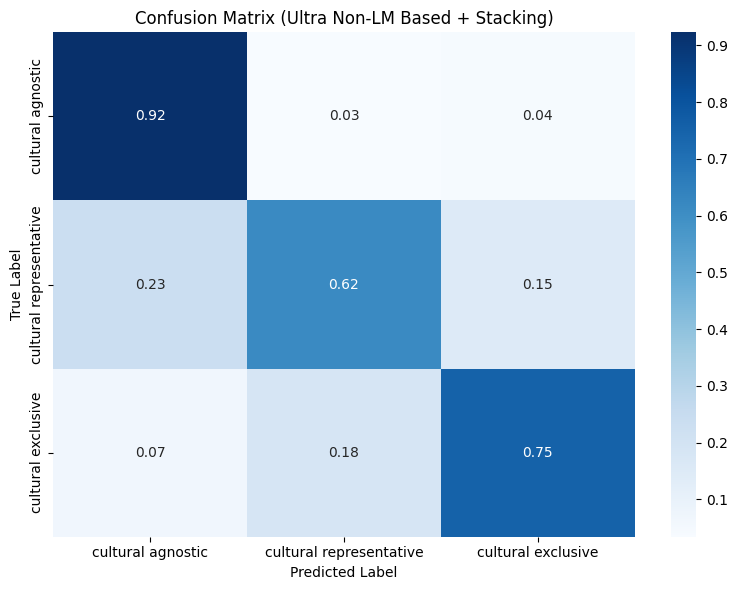

In [45]:
import os
import json
import pandas as pd
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    precision_recall_fscore_support,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

if TEST_ON_VALID_SET:
    LABELS = ["cultural agnostic", "cultural representative", "cultural exclusive"]
    label_mapping = {
        "cultural agnostic": 0,
        "cultural representative": 1,
        "cultural exclusive": 2
    }

    # --- 1) Map y_val once (strings → ints) ---
    y_val_mapped = pd.Series(y_val).map(label_mapping).values

    # --- 2) Take y_pred directly from your argmax output (already ints) ---
    #     If it's a list, convert to array:
    y_pred_mapped = np.array(y_pred)

    # Sanity check
    assert y_val_mapped.shape == y_pred_mapped.shape, \
        f"Shapes mismatch: {y_val_mapped.shape} vs {y_pred_mapped.shape}"

    def evaluate(preds, labels):
        precision, recall, f1, _ = precision_recall_fscore_support(
            labels, preds, average="macro", zero_division=0
        )
        acc = accuracy_score(labels, preds)
        return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

    # === Plotting ===
    os.makedirs("nonlm_based", exist_ok=True)
    cm = confusion_matrix(
        y_val_mapped,
        y_pred_mapped,
        labels=[0, 1, 2],
        normalize="true"
    )
    df_cm = pd.DataFrame(cm, index=LABELS, columns=LABELS)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues", cbar=True)
    plt.title("Confusion Matrix (Ultra Non-LM Based + Stacking)")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    #plt.savefig("nonlm_based/confusion_matrix_ultra_stacking.png")
    #plt.close()

    # === Final Metrics ===
    metrics = evaluate(y_pred_mapped, y_val_mapped)
    print("\nUltra Stacking Mode Completed!")
    print(f"Final evaluation metrics: {metrics}")
